# Unsupervised learning 

## Clustering

In [4]:
#Importing all modules 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import silhouette_samples, silhouette_score
import sklearn.cluster as cluster

In [5]:
df = pd.read_excel('C:/Users/ChinmayB/Desktop/IRIS_WO_TARGET.xlsx')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

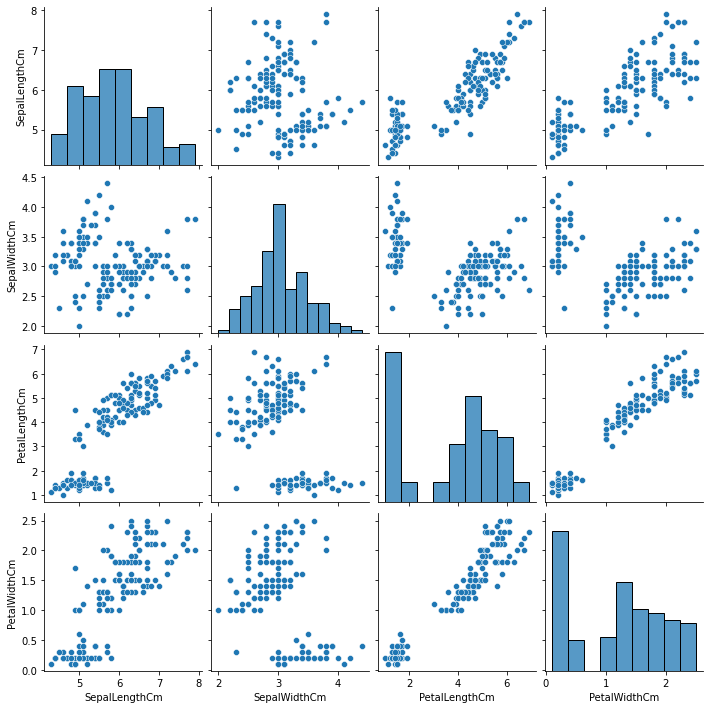

In [8]:
#Pair plot will show pairwise dependencies of each attribute with other all attributes 
sns.pairplot(df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])

In [9]:
x = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

Elbow method 
-It is named as elbow method as its shape looks like elbow of human
-We will use elbow method to find optimum number of clusters 
-The number at the elbow is our optimal cluster number 

C:\Users\ChinmayB\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


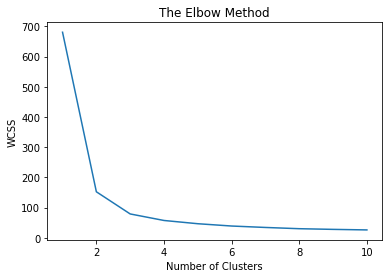

In [11]:
X_train = x

kmeans = cluster.KMeans(n_clusters=10 ,init="k-means++")
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans = kmeans.fit(X_train)   
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
y = kmeans.labels_
df['Clusters'] = kmeans.labels_
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Clusters
0,1,5.1,3.5,1.4,0.2,8
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,8


In [13]:
df['Clusters'].value_counts()

8    23
0    22
2    21
1    20
3    19
5    19
7     9
4     7
9     7
6     3
Name: Clusters, dtype: int64

In [14]:
kmeans = KMeans(n_clusters=3, random_state=2)
kmeans = kmeans.fit(X_train)
print("The clusters are: ", kmeans.labels_)


The clusters are:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [15]:
# K-means module
kmeans = KMeans(n_clusters=3, random_state=2)
kmeans = kmeans.fit(X_train)
kmeans.labels_
predictions = kmeans.predict(X_train)
unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,3)
countscldf = pd.DataFrame(counts, columns = ["Cluster 0","Cluster 1","Cluster 2"])
countscldf

,Cluster 0,Cluster 1,Cluster 2
0,50,62,38


Explained variance ratio (first two components): [0.92461621 0.05301557]


<Figure size 432x288 with 0 Axes>

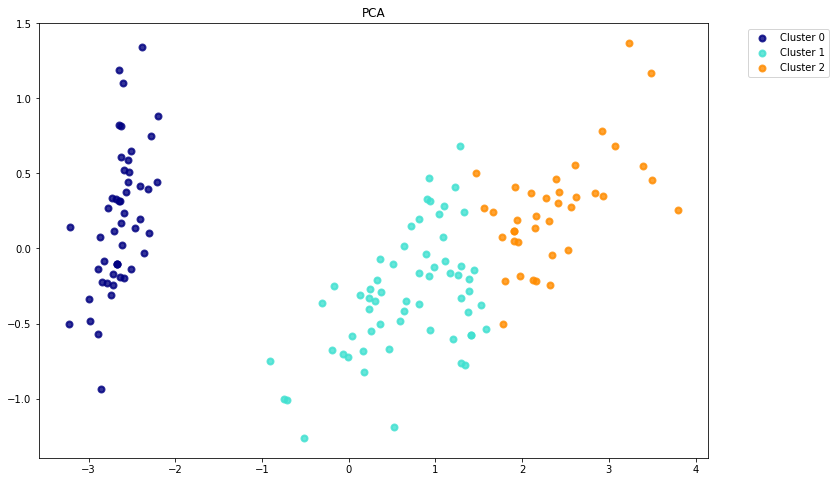

0.5525919445499755


In [16]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X = X_train
y_num = predictions
target_names = ["Cluster 0","Cluster 1","Cluster 2"]

pca = PCA(n_components=2, random_state = 453)
X_r = pca.fit(X).transform(X)
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))
# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA')
plt.show()
silhouette_avg_value = silhouette_score(X_train, predictions)
print(silhouette_avg_value)